Use digits mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [31]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [33]:
X_train = X_train/255
X_test = X_test/255

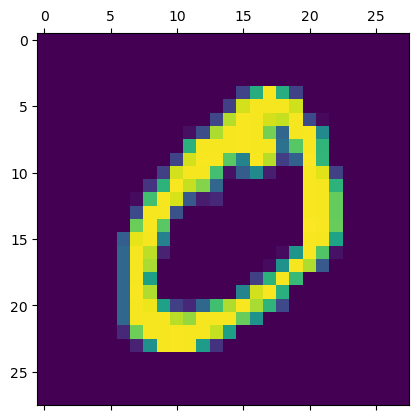

In [34]:
plt.matshow(X_train[1])

In [35]:
y_train[1]

0

In [36]:
X_test.shape

(10000, 28, 28)

# Artificial Neural Network

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 20)                15700     
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [53]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 2s 708us/step - loss: 0.4086 - accuracy: 0.8856


In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 543us/step - loss: 0.2536 - accuracy: 0.9239


[0.253621906042099, 0.9239000082015991]

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
confusion_matrix(y_test, y_pred)

313/313 [==============================] - 0s 448us/step


array([[ 963,    0,    1,    2,    4,    2,    6,    1,    1,    0],
       [   0, 1112,    2,    2,    1,    3,    4,    1,   10,    0],
       [  11,    5,  913,   17,   21,    0,   11,   15,   36,    3],
       [   3,    2,   12,  928,    6,   18,    1,   15,   14,   11],
       [   1,    2,    2,    0,  947,    0,    8,    2,    3,   17],
       [  11,    3,    1,   35,   17,  773,   17,    7,   21,    7],
       [  11,    3,    5,    1,   13,   13,  911,    0,    1,    0],
       [   2,    7,   20,    7,    9,    1,    0,  951,    3,   28],
       [   9,    7,    6,   24,   15,   31,   10,   15,  845,   12],
       [  11,    8,    1,   10,   55,    5,    1,   18,    4,  896]])

In [56]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))


313/313 [==============================] - 0s 491us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.88      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.87      0.96      0.91       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.87      0.88       974
           9       0.92      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [57]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 473us/step


7

In [58]:
print(y_test[0])

7


# Conventional Neural Network

In [59]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3, 3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [60]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [61]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.2311 - accuracy: 0.9320


In [62]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.98      0.97       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [63]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 1ms/step


7

In [64]:
print(y_test[0])

7


Use fashion mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

In [ ]:
class_names[train_labels[0]]

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def get_model(hidden_layers=1):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model = get_model(1)
model.fit(train_images, train_labels, epochs=5)

In [ ]:
class_names[test_labels[0]]

In [ ]:
class_names[np.argmax(model.predict(test_images)[0])]

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

i. Build a deep learning model to predict churn rate at bank. <br>
ii. Once model is built, print classification report and analyze precision, recall and f1-score <br>
iii. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

In [ ]:
df.Exited.value_counts()

In [ ]:
df_dropped = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_dropped.sample(5)

In [ ]:
df_dropped.dtypes

In [ ]:
df_with_dummies = pd.get_dummies(data=df_dropped, drop_first=True)
df_with_dummies

In [ ]:
df_with_dummies.dtypes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])
df_with_dummies

In [ ]:
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop("Exited", axis=1)
y = df_with_dummies["Exited"]
X_test, X_train, y_test, y_train= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
len(X_train.columns)

In [ ]:
def ANN(X_train, X_test, y_train, y_test):
    model= keras.Sequential([
        keras.layers.Dense(11, activation='relu', input_dim=11),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation= 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    model.evaluate(X_test, y_test)
    y_pred= np.round(model.predict(X_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred
     


In [ ]:
y_pred = ANN(X_train, X_test, y_train, y_test) 

# Undersampling

In [ ]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_0 = df_0.sample(407)
df_undersampled = pd.concat([df_0, df_1], axis=0)
df_undersampled

In [ ]:
X = df_undersampled.drop("Exited", axis=1)
y = df_undersampled["Exited"]
ANN(X, X_test,y, y_test)

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_1 = df_1.sample(1593, replace=True)

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_oversampled = pd.concat([df_0, df_1])
df_oversampled

In [ ]:
X = df_oversampled.drop("Exited", axis=1)
y = df_oversampled["Exited"]
ANN(X, X_test,y, y_test)

# Oversample SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
ANN(X_sm, X_test,y_sm, y_test)

# Ensemble

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]
len(df_0), len(df_1)

In [ ]:
1593//407

In [ ]:
lst_ensemble = []
for i in range(3):
    df_ensemble = pd.concat([df_0.sample(407), df_1])
    lst_ensemble.append(df_ensemble)

In [ ]:
lst_ensemble[2]

In [ ]:
X = lst_ensemble[0].drop("Exited", axis=1)
y = lst_ensemble[0]["Exited"]
y_pred1= ANN(X, X_test,y, y_test)

In [ ]:
X = lst_ensemble[1].drop("Exited", axis=1)
y = lst_ensemble[1]["Exited"]
y_pred2 = ANN(X, X_test,y, y_test)

In [ ]:
X = lst_ensemble[2].drop("Exited", axis=1)
y = lst_ensemble[2]["Exited"]
y_pred3 = ANN(X, X_test,y, y_test)

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred_final)):
    num = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if num >= 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [ ]:
print(classification_report(y_test, y_pred_final))